# [Zacklabe's website on Arctic Sea-Ice concentration](https://zacklabe.com/arctic-sea-ice-extentconcentration/) is Bullshit because 2014 was a peak year

Or so we should infer from this iteration:

[![Coded artists says that the data is bullshit because 2014 was a peak year and offers a graph](https://ivan.uria.dev/hubfs/Share/zlabe-is-bullshit.png)](https://masto.es/@ZLabe@fediscience.org/113969993123984031)

So, yeah, it is absolute bullshit and I am here up to prove it.

## <a id='content-table'></a>Content Table

- [Content Table](#content-table)
- [Data](#data)
- [Visualization](#visualization)
- [2014 Peaked](#2014)
- [Conclussion](#conclussion)
- [The Real Conclussion](#conclussion)

## <a id='data'></a>Data

The first google result on "artcic ice raw data" is [University of Colorado Boulder's National Snow and Ice Data Center](https://nsidc.org/data/seaice_index). Once you enter the data [it says](https://noaadata.apps.nsidc.org/NOAA/G02135/) that is from [NOAA](https://www.noaa.gov/about-our-agency#:~:text=National%20Oceanic%20and%20Atmospheric%20Administration,-1401%20Constitution%20Avenue) so I search on it on the Internet.

As I am a clever boy I find it quickly enough that [they reference each other](https://psl.noaa.gov/arctic/data/), so I'll play with the first data I found.

In [this link](https://noaadata.apps.nsidc.org/NOAA/G02135/north/monthly/data/) I find a csv with data from 1979 and updated a week ago. Perfect. Let's load'em.

[Here](https://nsidc.org/learn/ask-scientist/what-difference-between-sea-ice-area-and-extent) is important inteligence regarding area and extent.

In [1]:
# Let's import all of this becasue reasons.
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

The files follow the pattern N_\[MM\]_extent_v3.0.csv, being \[MM\] the month with two letters. Let's import all of them all in a DataFrame

In [2]:
df = pd.read_csv(f"https://noaadata.apps.nsidc.org/NOAA/G02135/north/monthly/data/N_01_extent_v3.0.csv")
for month in range(2, 13):
    df = pd.concat([df, pd.read_csv(f"https://noaadata.apps.nsidc.org/NOAA/G02135/north/monthly/data/N_{str(month).zfill(2)}_extent_v3.0.csv")])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 46
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           555 non-null    int64  
 1    mo            555 non-null    int64  
 2       data-type  555 non-null    object 
 3    region        555 non-null    object 
 4    extent        555 non-null    float64
 5      area        555 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 30.4+ KB


First let's clean the column names beacuse they are awkwardly formatted.

In [3]:
df.columns = ['year', 'mo', 'data-type', 'region', 'extent', 'area']

Previewing the data I came across with months without data. Let's confirm it.

In [4]:
df[["data-type"]].value_counts()

data-type
Goddard      528
NRTSI-G       25
  -9999        2
Name: count, dtype: int64

Just two months with a type data of "-9999". Let's check those rows before deciding on their fate

In [5]:
df[["data-type"]].value_counts().to_frame().index

MultiIndex([('      Goddard',),
            ('      NRTSI-G',),
            ('        -9999',)],
           names=['data-type'])

They need a bit cleaning before

In [6]:
df["data-type"] = list(map(lambda x: x.strip(), df["data-type"]))
df["region"] = list(map(lambda x: x.strip(), df["region"]))

In [7]:
df[df["data-type"] == '-9999']

,year,mo,data-type,region,extent,area
9,1988,1,-9999,N,-9999.0,-9999.0
9,1987,12,-9999,N,-9999.0,-9999.0


Two consecutive months. Let's check the rest of the data:

In [8]:
df_clean = df[df["data-type"] != '-9999']

In [9]:
df_clean.describe()

,year,mo,extent,area
count,553.000000,553.000000,553.000000,553.000000
mean,2001.508137,6.508137,11.328499,-8.851772
std,13.361895,3.457352,3.278373,425.606419
min,1978.000000,1.000000,3.570000,-9999.000000
25%,1990.000000,4.000000,8.480000,6.160000
50%,2002.000000,7.000000,12.020000,9.950000
75%,2013.000000,10.000000,14.220000,12.280000
max,2025.000000,12.000000,16.340000,13.900000


There are still areas without data.

In [10]:
df_clean[df_clean["area"] == -9999]

,year,mo,data-type,region,extent,area
8,1987,8,Goddard,N,7.63,-9999.0


Let's paint the areas from 1986 and 1989. All the missing data is here.

In [11]:
df[list(map(lambda x: 1986 <= x <= 1989, df["year"]))].sort_values(by=["year", "mo"])

,year,mo,data-type,region,extent,area
7,1986,1,Goddard,N,14.89,11.88
7,1986,2,Goddard,N,15.78,12.62
7,1986,3,Goddard,N,15.91,12.72
7,1986,4,Goddard,N,15.06,12.04
7,1986,5,Goddard,N,13.38,10.70
7,1986,6,Goddard,N,11.98,8.99
7,1986,7,Goddard,N,10.15,6.62
7,1986,8,Goddard,N,7.98,5.01
7,1986,9,Goddard,N,7.41,4.72
7,1986,10,Goddard,N,9.48,6.83


As the ice melting or freezing is something that happens gradually, let's reuse the 1988 and 1989 data due to its similarity.

In [12]:
_1987 = df["year"] == 1987
_1988 = df["year"] == 1988
_1989 = df["year"] == 1989
_jan = df["mo"] == 1
_aug = df["mo"] == 8
_dec = df["mo"] == 12

In [13]:
df.loc[_1987 & _aug, "area"] = df[_1988 & _aug]["area"].values[0]
df.loc[_1987 & _dec, "area"] = df[_1988 & _dec]["area"].values[0]
df.loc[_1988 & _jan, "area"] = df[_1989 & _jan]["area"].values[0]
df.loc[_1987 & _dec, "extent"] = df[_1988 & _dec]["extent"].values[0]
df.loc[_1988 & _jan, "extent"] = df[_1989 & _jan]["extent"].values[0]

In [14]:
df.describe()

,year,mo,extent,area
count,555.000000,555.000000,555.000000,555.000000
mean,2001.457658,6.508108,11.339171,9.251459
std,13.364223,3.466892,3.277507,3.265614
min,1978.000000,1.000000,3.570000,2.410000
25%,1990.000000,3.500000,8.510000,6.175000
50%,2001.000000,7.000000,12.030000,9.950000
75%,2013.000000,10.000000,14.245000,12.285000
max,2025.000000,12.000000,16.340000,13.900000


Let's set the dates as date type

In [15]:
from datetime import datetime

df["date"] = pd.to_datetime(list(map(lambda x: datetime(x[1]["year"], x[1]["mo"], 1), df.iterrows())))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 46
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   year       555 non-null    int64         
 1   mo         555 non-null    int64         
 2   data-type  555 non-null    object        
 3   region     555 non-null    object        
 4   extent     555 non-null    float64       
 5   area       555 non-null    float64       
 6   date       555 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 34.7+ KB


The final dataframe will keep only date, area and extent.

In [17]:
df_clean = df[["date", "extent", "area"]].sort_values(by=["date"])

## <a id="visualization"></a>Visualization

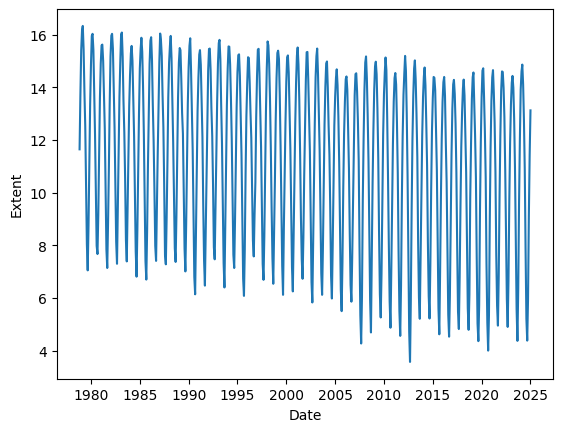

In [18]:
plt.plot(df_clean["date"], df_clean["extent"])
plt.xlabel("Date")
plt.ylabel("Extent")
plt.show()
plt.close()

Quite ugly, to be fair, but I guess...

In [19]:
df_extent = df.groupby('year')['extent'].aggregate(['min', 'mean', 'max'])

Let's drop first and last year because there are not enough data for an aggregate

In [20]:
df_extent = df_extent.drop([df_extent.index.min(), df_extent.index.max()])

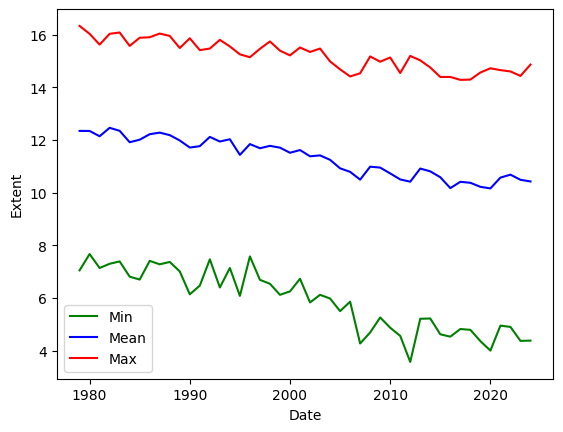

In [21]:
plt.plot(df_extent.index, df_extent["min"], color="green", label="Min")
plt.plot(df_extent.index, df_extent["mean"], color="blue", label="Mean")
plt.plot(df_extent.index, df_extent["max"], color="red", label="Max")
plt.xlabel("Date")
plt.ylabel("Extent")
plt.legend()
plt.show()
plt.close()

Ouch! The graph clearly shows that arctic ice is receeding. Mainly in summer. Let's do the same with the areas.

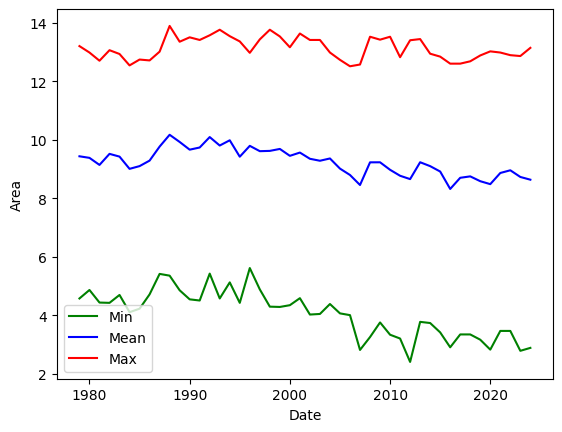

In [22]:
df_area = df.groupby('year')['area'].aggregate(['min', 'mean', 'max'])
df_area = df_area.drop([df_area.index.min(), df_area.index.max()])

plt.plot(df_area.index, df_area["min"], color="green", label="Min")
plt.plot(df_area.index, df_area["mean"], color="blue", label="Mean")
plt.plot(df_area.index, df_area["max"], color="red", label="Max")
plt.xlabel("Date")
plt.ylabel("Area")
plt.legend()
plt.show()
plt.close()

More or less the same. If we perform a linear regression (surely not accurate) to see whether the areas are receeding throgh time or not.

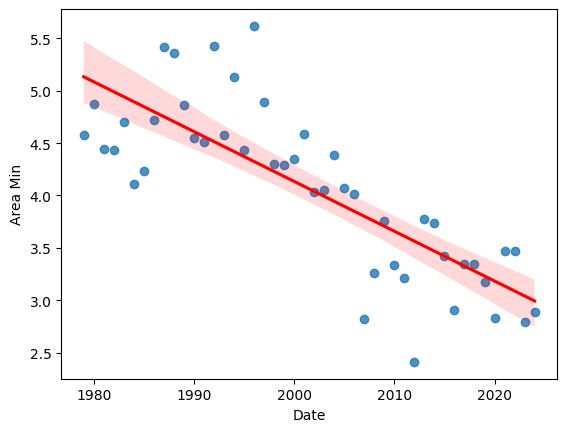

In [23]:
sns.regplot(y=df_area["min"], x=df_area.index, line_kws={"color": "r"})
plt.xlabel("Date")
plt.ylabel("Area Min")
plt.show()
plt.close()

In [24]:
lre = LinearRegression()
lre.fit(df_area[["min"]], df_area.index)
lre.score(df_area[["min"]], df_area.index)

0.6334548994662563

Not a prediction model per se, but it shows ice is melting more nowadays than 40 years ago. What about the max and the mean?

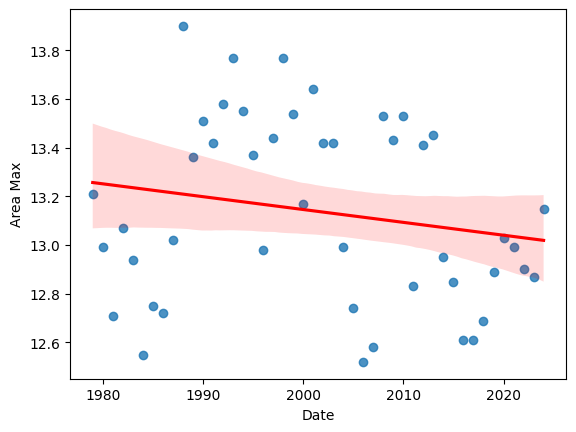

In [25]:
sns.regplot(y=df_area["max"], x=df_area.index, line_kws={"color": "r"})
plt.xlabel("Date")
plt.ylabel("Area Max")
plt.show()
plt.close()

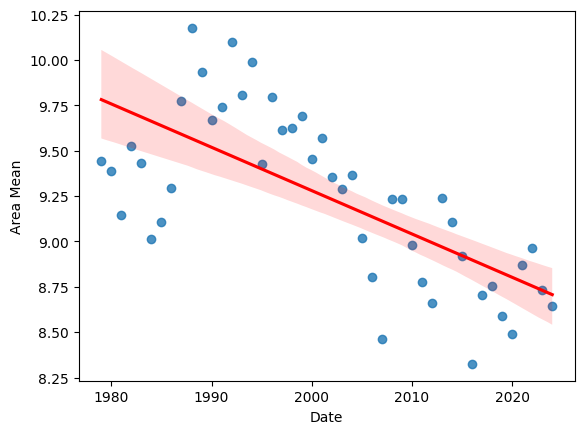

In [26]:
sns.regplot(y=df_area["mean"], x=df_area.index, line_kws={"color": "r"})
plt.xlabel("Date")
plt.ylabel("Area Mean")
plt.show()
plt.close()

Well, we can breath, the maximum area of Ice is kind of stabilized. Can't we?

## <a id='2014'></a>2014 Peaked

Regarding the graph provided, the avg of 2014 was ~13 and the max # 20. So I suppose We're talking about extent, which it gets the higher figures.

In [27]:
print(f"Max Extension for 2014: {df_extent.loc[2014, "max"]}")
print(f"Mean Extension for 2014: {df_extent.loc[2014, "mean"]}")

Max Extension for 2014: 14.76
Mean Extension for 2014: 10.8125


The numbers are not related at all. Let's check the graphs.

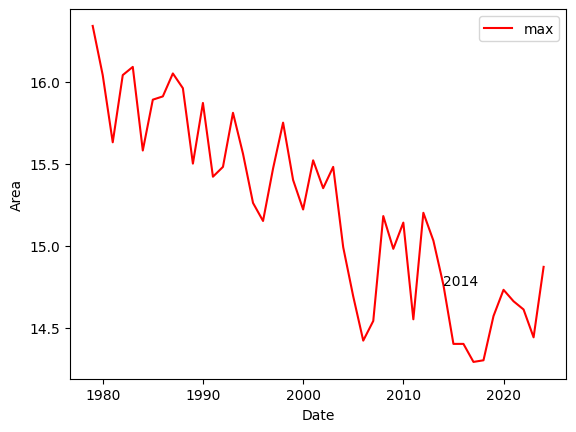

In [28]:
plt.plot(df_extent.index, df_extent["max"], color="red", label="max")
plt.xlabel("Date")
plt.ylabel("Area")
plt.text(2014, df_extent.loc[2014, "max"], '2014')
plt.legend()
plt.show()
plt.close()

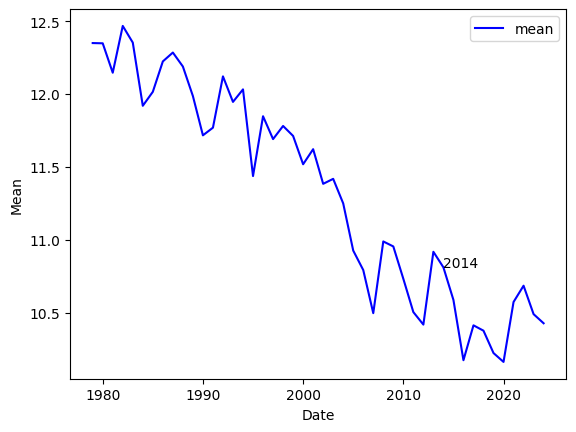

In [29]:
plt.plot(df_extent.index, df_extent["mean"], color="blue", label="mean")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.text(2014, df_extent.loc[2014, "mean"], '2014') 
plt.legend()
plt.show()
plt.close()

Not so peaky. I have a clear conclussion.

## <a id='conclussion'></a>Conclussion

Clearly [University of Colorado Boulder's National Snow and Ice Data Center](https://nsidc.org/data/seaice_index) data from NOAA and Zacklabe's data is fake and bullshit to set a woke agenda for us all to believe that the ice is melting.

We all know a random screeshot from a random guy without any source is the best resource. **Isn't it?**

## <a id="real-conclussion"></a>The Real Conclussion

The *clever guy* in Mastodon cannot tell Arctic from Antarctic. The graph shows how the ice grows during spring and summer on the north hemisphere and it melts during fall and winter on the north hemisphere.